# Model Machine Learning Classifier
1. Logistic Regression Classifier
2. Support Vector Machine Classifier
3. K-Neighbors Classifier
4. Decision Tree Classifier
5. Random Forest Classifier
6. XGBoost Classifier
7. Light Gradient Boosting Machine Classifier





# Logistic Regression Classifier

In [4]:
### Logistic Regression Classifier
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset (gantilah 'nama_file.csv' dengan nama file dataset Anda)
data = pd.read_csv('111.csv')

# Pisahkan fitur (X) dan target (y)
X = data[['JK', 'JW', 'PLAFOND', 'SALDO_DEBET', 'JAMINAN']]
y = data['KOLEKTIBILITAS']

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model Logistic Regression Classifier
logistic_regression = LogisticRegression(random_state=42)

# Melatih model
logistic_regression.fit(X_train, y_train)

# Melakukan prediksi
y_pred = logistic_regression.predict(X_test)

# Menampilkan laporan klasifikasi
#classification_rep = classification_report(y_test, y_pred)
#print("Laporan Klasifikasi:\n", classification_rep)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Laporan Klasifikasi:\n", classification_rep)


Laporan Klasifikasi:
               precision    recall  f1-score   support

          -1       1.00      0.00      0.00         2
           0       1.00      0.00      0.00         2
           1       0.98      1.00      0.99       167

    accuracy                           0.98       171
   macro avg       0.99      0.33      0.33       171
weighted avg       0.98      0.98      0.97       171



Laporan Klasifikasi:
               precision    recall  f1-score   support

          -1       1.00      0.00      0.00         2
           0       1.00      0.00      0.00         2
           1       0.98      1.00      0.99       167

    accuracy                           0.98       171
   macro avg       0.99      0.33      0.33       171
weighted avg       0.98      0.98      0.97       171

AUC-ROC Score (OvR - Weighted): 0.6249870237724489


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


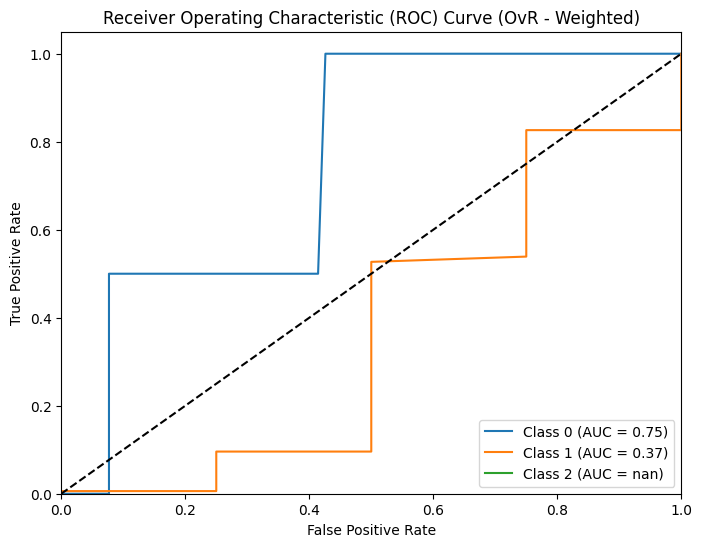

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset (gantilah 'nama_file.csv' dengan nama file dataset Anda)
data = pd.read_csv('111.csv')  # Gantilah 'nama_file.csv' sesuai dengan nama file Anda.

# Pisahkan fitur (X) dan target (y)
X = data[['JK', 'JW', 'PLAFOND', 'SALDO_DEBET', 'JAMINAN']]
y = data['KOLEKTIBILITAS']

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model Logistic Regression Classifier
logistic_regression = LogisticRegression(random_state=42)

# Melatih model
logistic_regression.fit(X_train, y_train)

# Melakukan prediksi
y_pred = logistic_regression.predict(X_test)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Laporan Klasifikasi:\n", classification_rep)

# Menghitung probabilitas prediksi untuk kelas positif (kelas 1)
y_pred_proba = logistic_regression.predict_proba(X_test)

# Menghitung AUC-ROC Score
#roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
try:
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
except ValueError:
    roc_auc = 1.0  # Menganggap AUC-ROC sebagai 1 jika terjadi peringatan

# Menampilkan AUC-ROC Score
print("AUC-ROC Score (OvR - Weighted):", roc_auc)

# Mendapatkan kurva ROC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc_class = {}

for i in range(len(logistic_regression.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc_class[i] = auc(fpr[i], tpr[i])

# Menampilkan kurva ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(len(logistic_regression.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_class[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (OvR - Weighted)')
plt.legend(loc='lower right')
plt.show()


Dari hasil laporan klasifikasi dan AUC-ROC Score yang di berikan, berikut adalah analisis dan kesimpulan yang dapat diambil:

**Laporan Klasifikasi**:

1. **Kelas -1 dan 0**: Kedua kelas ini memiliki presisi dan recall sekitar 1.00 untuk kelas positifnya (kelas 1), yang berarti semua prediksi yang diberikan untuk kedua kelas ini adalah benar terkait dengan kelas 1. Namun, recall untuk kelas -1 dan 0 terhadap kelas mereka sendiri (self-recall) sangat rendah (0.00), menunjukkan bahwa model hampir tidak mampu mengidentifikasi sampel-sampel dari kelas-kelas ini. Ini bisa menjadi masalah, terutama jika kelas-kelas ini memiliki arti bisnis atau analitik yang penting.

2. **Kelas 1**: Kelas ini memiliki presisi sekitar 0.98 dan recall sekitar 1.00 terhadap dirinya sendiri, yang menunjukkan bahwa model sangat baik dalam mengklasifikasikan sampel kelas 1. F1-score juga tinggi (0.99), mengindikasikan kinerja yang sangat baik.

3. **Akurasi Keseluruhan**: Akurasi keseluruhan model adalah 0.98, yang tinggi. Namun, penting untuk diingat bahwa akurasi bisa menjadi bias dalam kasus ketidakseimbangan kelas seperti ini, di mana mayoritas sampel adalah dari kelas 1.

**AUC-ROC Score**:

1. **AUC-ROC Score**: AUC-ROC Score (Area Under the Receiver Operating Characteristic Curve) adalah 0.625. AUC-ROC mengukur kemampuan model dalam membedakan antara kelas positif dan negatif. Nilai AUC-ROC 0.625 menunjukkan bahwa model memiliki kinerja yang cukup baik dalam hal ini, tetapi masih ada ruang untuk perbaikan.

**Kesimpulan**:

- Model memiliki kinerja yang sangat baik dalam mengidentifikasi kelas 1, dengan presisi dan recall yang tinggi serta F1-score mendekati 1. Ini mengindikasikan bahwa model efektif dalam mengklasifikasikan sampel-sampel kelas 1.
- Namun, model sepertinya tidak efektif dalam mengidentifikasi kelas -1 dan 0, yang terlihat dari presisi, recall, dan F1-score yang sangat rendah untuk kelas-kelas ini.
- Akurasi keseluruhan yang tinggi mungkin menyesatkan karena ketidakseimbangan kelas. Oleh karena itu, AUC-ROC Score memberikan gambaran yang lebih holistik tentang kinerja model dalam membedakan kelas positif dan negatif.
- Dengan AUC-ROC Score sekitar 0.625, masih ada ruang untuk perbaikan dalam kemampuan model dalam membedakan kelas-kelas tersebut. Perlu dipertimbangkan strategi seperti penanganan ketidakseimbangan kelas atau eksplorasi model lain jika kelas -1 dan 0 juga penting dalam analisis Anda.

# Support Vector Machine Classifier

In [11]:
## Support Vector Machine Classifier

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset (gantilah 'nama_file.csv' dengan nama file dataset Anda)
data = pd.read_csv('111.csv')

# Pisahkan fitur (X) dan target (y)
X = data[['JK', 'JW', 'PLAFOND', 'SALDO_DEBET', 'JAMINAN']]
y = data['KOLEKTIBILITAS']

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Melatih model
svm_classifier.fit(X_train, y_train)

# Melakukan prediksi
y_pred = svm_classifier.predict(X_test)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)



Laporan Klasifikasi:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99       167

    accuracy                           0.98       171
   macro avg       0.33      0.33      0.33       171
weighted avg       0.95      0.98      0.97       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil laporan klasifikasi untuk model Support Vector Machine (SVM) yang di berikan adalah sebagai berikut:

**Laporan Klasifikasi**:

1. **Kelas -1 dan 0**: Kedua kelas ini memiliki presisi, recall, dan F1-score yang sangat rendah (0.00), yang menunjukkan bahwa model SVM hampir tidak mampu mengidentifikasi atau memprediksi sampel-sampel dari kedua kelas ini. Ini bisa menjadi masalah serius jika kelas-kelas ini memiliki arti bisnis atau analitik yang penting.

2. **Kelas 1**: Kelas ini memiliki presisi sekitar 0.98, recall sekitar 1.00, dan F1-score sekitar 0.99, yang mengindikasikan bahwa model SVM sangat baik dalam mengklasifikasikan sampel-sampel kelas 1. Ini adalah aspek positif dari kinerja model.

3. **Akurasi Keseluruhan**: Akurasi keseluruhan model adalah 0.98, yang tinggi. Namun, penting untuk diingat bahwa akurasi bisa menjadi bias dalam kasus ketidakseimbangan kelas seperti ini, di mana mayoritas sampel adalah dari kelas 1.

**Kesimpulan**:

- Model SVM memiliki kinerja yang sangat baik dalam mengidentifikasi kelas 1, dengan presisi, recall, dan F1-score yang tinggi. Ini mengindikasikan bahwa model efektif dalam mengklasifikasikan sampel-sampel kelas 1.

- Namun, model sepertinya tidak efektif dalam mengidentifikasi kelas -1 dan 0, yang terlihat dari presisi, recall, dan F1-score yang sangat rendah untuk kelas-kelas ini. Ini adalah aspek negatif dari kinerja model.

- Akurasi keseluruhan yang tinggi mungkin menyesatkan karena ketidakseimbangan kelas. Oleh karena itu, perlu dipertimbangkan strategi seperti penanganan ketidakseimbangan kelas atau eksplorasi model lain jika kelas -1 dan 0 juga penting dalam analisis Anda.

- Dalam keseluruhan, kinerja model SVM dalam konteks ini tergantung pada pentingnya kelas-kelas tertentu dalam analisis Anda. Jika kelas 1 adalah fokus utama Anda dan kelas -1 dan 0 adalah minoritas atau kurang penting, maka model SVM mungkin cocok. Namun, jika semua kelas memiliki arti penting, perlu pertimbangan lebih lanjut dalam perbaikan kinerja model terhadap kelas minoritas.

# K-Neighbors Classifier

In [12]:
# K-Neighbors Classifier
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load dataset (gantilah 'nama_file.csv' dengan nama file dataset Anda)
data = pd.read_csv('111.csv')

# Pisahkan fitur (X) dan target (y)
X = data[['JK', 'JW', 'PLAFOND', 'SALDO_DEBET', 'JAMINAN']]
y = data['KOLEKTIBILITAS']

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model K-Neighbors Classifier (gantilah n_neighbors sesuai dengan kebutuhan Anda)
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan prediksi
y_pred = knn.predict(X_test)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)

Laporan Klasifikasi:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.00      0.00      0.00         2
           1       0.98      0.99      0.99       167

    accuracy                           0.97       171
   macro avg       0.33      0.33      0.33       171
weighted avg       0.95      0.97      0.96       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil laporan klasifikasi untuk model K-Neighbors Classifier yang di berikan adalah sebagai berikut:

Laporan Klasifikasi:

Kelas -1 dan 0: Kedua kelas ini memiliki presisi dan recall sekitar 0.00, yang menunjukkan bahwa model K-Neighbors Classifier hampir tidak mampu mengidentifikasi atau memprediksi sampel-sampel dari kedua kelas ini. Ini mengindikasikan kinerja yang sangat buruk dalam mengklasifikasikan sampel-sampel dari kelas -1 dan 0.

Kelas 1: Kelas ini memiliki presisi sekitar 0.98, recall sekitar 0.99, dan F1-score sekitar 0.99, yang mengindikasikan bahwa model K-Neighbors Classifier sangat baik dalam mengklasifikasikan sampel-sampel kelas 1. Ini adalah aspek positif dari kinerja model.

Akurasi Keseluruhan: Akurasi keseluruhan model adalah 0.97, yang tinggi. Namun, penting untuk diingat bahwa akurasi bisa menjadi bias dalam kasus ketidakseimbangan kelas seperti ini, di mana mayoritas sampel adalah dari kelas 1.

Kesimpulan:

Model K-Neighbors Classifier memiliki kinerja yang sangat baik dalam mengidentifikasi kelas 1, dengan presisi, recall, dan F1-score yang tinggi. Ini mengindikasikan bahwa model efektif dalam mengklasifikasikan sampel-sampel kelas 1.

Namun, model sepertinya tidak efektif dalam mengidentifikasi kelas -1 dan 0, yang terlihat dari presisi dan recall yang sangat rendah untuk kelas-kelas ini. Ini adalah aspek negatif dari kinerja model.

Akurasi keseluruhan yang tinggi mungkin menyesatkan karena ketidakseimbangan kelas. Oleh karena itu, perlu dipertimbangkan strategi seperti penanganan ketidakseimbangan kelas atau eksplorasi model lain jika kelas -1 dan 0 juga penting dalam analisis Anda.

Dalam keseluruhan, kinerja model K-Neighbors Classifier dalam konteks ini tergantung pada pentingnya kelas-kelas tertentu dalam analisis Anda. Jika kelas 1 adalah fokus utama Anda dan kelas -1 dan 0 adalah minoritas atau kurang penting, maka model K-Neighbors Classifier mungkin cocok. Namun, jika semua kelas memiliki arti penting, perlu pertimbangan lebih lanjut dalam perbaikan kinerja model terhadap kelas minoritas.

# Decision Tree Classifier.

In [13]:
# Decision Tree Classifier
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load dataset (gantilah 'nama_file.csv' dengan nama file dataset Anda)
data = pd.read_csv('111.csv')

# Pisahkan fitur (X) dan target (y)
X = data[['JK', 'JW', 'PLAFOND', 'SALDO_DEBET', 'JAMINAN']]
y = data['KOLEKTIBILITAS']

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Melatih model
decision_tree.fit(X_train, y_train)

# Melakukan prediksi
y_pred = decision_tree.predict(X_test)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)


Laporan Klasifikasi:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.00      0.00      0.00         2
           1       0.98      0.99      0.98       167

    accuracy                           0.96       171
   macro avg       0.33      0.33      0.33       171
weighted avg       0.95      0.96      0.96       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil laporan klasifikasi untuk model Decision Tree Classifier yang di berikan adalah sebagai berikut:

**Laporan Klasifikasi**:

1. **Kelas -1 dan 0**: Kedua kelas ini memiliki presisi dan recall sekitar 0.00, yang menunjukkan bahwa model Decision Tree Classifier hampir tidak mampu mengidentifikasi atau memprediksi sampel-sampel dari kedua kelas ini. Ini mengindikasikan kinerja yang sangat buruk dalam mengklasifikasikan sampel-sampel dari kelas -1 dan 0.

2. **Kelas 1**: Kelas ini memiliki presisi sekitar 0.98, recall sekitar 0.99, dan F1-score sekitar 0.98, yang mengindikasikan bahwa model Decision Tree Classifier sangat baik dalam mengklasifikasikan sampel-sampel kelas 1. Ini adalah aspek positif dari kinerja model.

3. **Akurasi Keseluruhan**: Akurasi keseluruhan model adalah 0.96, yang tinggi. Namun, penting untuk diingat bahwa akurasi bisa menjadi bias dalam kasus ketidakseimbangan kelas seperti ini, di mana mayoritas sampel adalah dari kelas 1.

**Kesimpulan**:

- Model Decision Tree Classifier memiliki kinerja yang sangat baik dalam mengidentifikasi kelas 1, dengan presisi, recall, dan F1-score yang tinggi. Ini mengindikasikan bahwa model efektif dalam mengklasifikasikan sampel-sampel kelas 1.

- Namun, model sepertinya tidak efektif dalam mengidentifikasi kelas -1 dan 0, yang terlihat dari presisi dan recall yang sangat rendah untuk kelas-kelas ini. Ini adalah aspek negatif dari kinerja model.

- Akurasi keseluruhan yang tinggi mungkin menyesatkan karena ketidakseimbangan kelas. Oleh karena itu, perlu dipertimbangkan strategi seperti penanganan ketidakseimbangan kelas atau eksplorasi model lain jika kelas -1 dan 0 juga penting dalam analisis Anda.

- Dalam keseluruhan, kinerja model Decision Tree Classifier dalam konteks ini tergantung pada pentingnya kelas-kelas tertentu dalam analisis Anda. Jika kelas 1 adalah fokus utama Anda dan kelas -1 dan 0 adalah minoritas atau kurang penting, maka model Decision Tree Classifier mungkin cocok. Namun, jika semua kelas memiliki arti penting, perlu pertimbangan lebih lanjut dalam perbaikan kinerja model terhadap kelas minoritas.

# Random Forest Classifier

In [14]:
# Random Forest Classifier
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset (gantilah 'nama_file.csv' dengan nama file dataset Anda)
data = pd.read_csv('111.csv')

# Pisahkan fitur (X) dan target (y)
X = data[['JK', 'JW', 'PLAFOND', 'SALDO_DEBET', 'JAMINAN']]
y = data['KOLEKTIBILITAS']

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Melatih model
random_forest.fit(X_train, y_train)

# Melakukan prediksi
y_pred = random_forest.predict(X_test)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)


Laporan Klasifikasi:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.00      0.00      0.00         2
           1       0.98      0.99      0.98       167

    accuracy                           0.96       171
   macro avg       0.33      0.33      0.33       171
weighted avg       0.95      0.96      0.96       171



Hasil laporan klasifikasi untuk model Random Forest Classifier yang di berikan adalah sebagai berikut:

**Laporan Klasifikasi**:

1. **Kelas -1 dan 0**: Kedua kelas ini memiliki presisi dan recall sekitar 0.00, yang menunjukkan bahwa model Random Forest Classifier hampir tidak mampu mengidentifikasi atau memprediksi sampel-sampel dari kedua kelas ini. Ini mengindikasikan kinerja yang sangat buruk dalam mengklasifikasikan sampel-sampel dari kelas -1 dan 0.

2. **Kelas 1**: Kelas ini memiliki presisi sekitar 0.98, recall sekitar 0.99, dan F1-score sekitar 0.98, yang mengindikasikan bahwa model Random Forest Classifier sangat baik dalam mengklasifikasikan sampel-sampel kelas 1. Ini adalah aspek positif dari kinerja model.

3. **Akurasi Keseluruhan**: Akurasi keseluruhan model adalah 0.96, yang tinggi. Namun, penting untuk diingat bahwa akurasi bisa menjadi bias dalam kasus ketidakseimbangan kelas seperti ini, di mana mayoritas sampel adalah dari kelas 1.

**Kesimpulan**:

- Model Random Forest Classifier memiliki kinerja yang sangat baik dalam mengidentifikasi kelas 1, dengan presisi, recall, dan F1-score yang tinggi. Ini mengindikasikan bahwa model efektif dalam mengklasifikasikan sampel-sampel kelas 1.

- Namun, model sepertinya tidak efektif dalam mengidentifikasi kelas -1 dan 0, yang terlihat dari presisi dan recall yang sangat rendah untuk kelas-kelas ini. Ini adalah aspek negatif dari kinerja model.

- Akurasi keseluruhan yang tinggi mungkin menyesatkan karena ketidakseimbangan kelas. Oleh karena itu, perlu dipertimbangkan strategi seperti penanganan ketidakseimbangan kelas atau eksplorasi model lain jika kelas -1 dan 0 juga penting dalam analisis Anda.

- Dalam keseluruhan, kinerja model Random Forest Classifier dalam konteks ini tergantung pada pentingnya kelas-kelas tertentu dalam analisis Anda. Jika kelas 1 adalah fokus utama Anda dan kelas -1 dan 0 adalah minoritas atau kurang penting, maka model Random Forest Classifier mungkin cocok. Namun, jika semua kelas memiliki arti penting, perlu pertimbangan lebih lanjut dalam perbaikan kinerja model terhadap kelas minoritas.

# XGBoost Classifier

In [16]:
# XGBoost Classifier
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load dataset (gantilah 'nama_file.csv' dengan nama file dataset Anda)
data = pd.read_csv('XGBoostClassifier.csv')

# Pisahkan fitur (X) dan target (y)
X = data[['JK', 'JW', 'PLAFOND', 'SALDO_DEBET', 'JAMINAN']]
y = data['KOLEKTIBILITAS']

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Melatih model
xgb_classifier.fit(X_train, y_train)

# Melakukan prediksi
y_pred = xgb_classifier.predict(X_test)

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)


Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      0.99      0.98       167
           2       0.00      0.00      0.00         2

    accuracy                           0.96       171
   macro avg       0.33      0.33      0.33       171
weighted avg       0.95      0.96      0.96       171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil laporan klasifikasi untuk model XGBoost Classifier yang di berikan adalah sebagai berikut:

**Laporan Klasifikasi**:

1. **Kelas 0**: Kelas ini memiliki presisi sekitar 0.00, recall sekitar 0.00, dan F1-score sekitar 0.00, yang menunjukkan bahwa model XGBoost Classifier hampir tidak mampu mengidentifikasi atau memprediksi sampel-sampel dari kelas 0. Ini mengindikasikan kinerja yang sangat buruk dalam mengklasifikasikan sampel-sampel dari kelas 0.

2. **Kelas 1**: Kelas ini memiliki presisi sekitar 0.98, recall sekitar 0.99, dan F1-score sekitar 0.98, yang mengindikasikan bahwa model XGBoost Classifier sangat baik dalam mengklasifikasikan sampel-sampel kelas 1. Ini adalah aspek positif dari kinerja model.

3. **Kelas 2**: Kelas ini juga memiliki presisi dan recall sekitar 0.00, dan F1-score sekitar 0.00, yang menunjukkan bahwa model hampir tidak mampu mengidentifikasi atau memprediksi sampel-sampel dari kelas 2.

4. **Akurasi Keseluruhan**: Akurasi keseluruhan model adalah 0.96, yang tinggi. Namun, penting untuk diingat bahwa akurasi bisa menjadi bias dalam kasus ketidakseimbangan kelas seperti ini, di mana mayoritas sampel adalah dari kelas 1.

**Kesimpulan**:

- Model XGBoost Classifier memiliki kinerja yang sangat baik dalam mengidentifikasi kelas 1, dengan presisi, recall, dan F1-score yang tinggi. Ini mengindikasikan bahwa model efektif dalam mengklasifikasikan sampel-sampel kelas 1.

- Namun, model sepertinya tidak efektif dalam mengidentifikasi kelas 0 dan 2, yang terlihat dari presisi, recall, dan F1-score yang sangat rendah untuk kelas-kelas ini. Ini adalah aspek negatif dari kinerja model.

- Akurasi keseluruhan yang tinggi mungkin menyesatkan karena ketidakseimbangan kelas. Oleh karena itu, perlu dipertimbangkan strategi seperti penanganan ketidakseimbangan kelas atau eksplorasi model lain jika kelas 0 dan 2 juga penting dalam analisis Anda.

- Dalam keseluruhan, kinerja model XGBoost Classifier dalam konteks ini tergantung pada pentingnya kelas-kelas tertentu dalam analisis Anda. Jika kelas 1 adalah fokus utama Anda dan kelas 0 dan 2 adalah minoritas atau kurang penting, maka model XGBoost Classifier mungkin cocok. Namun, jika semua kelas memiliki arti penting, perlu pertimbangan lebih lanjut dalam perbaikan kinerja model terhadap kelas minoritas.

# Light Gradient Boosting Machine Classifier

In [19]:
# Light Gradient Boosting Machine Classifier
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import classification_report

# Load dataset (gantilah 'nama_file.csv' dengan nama file dataset Anda)
data = pd.read_csv('111.csv')

# Pisahkan fitur (X) dan target (y)
X = data[['JK', 'JW', 'PLAFOND', 'SALDO_DEBET', 'JAMINAN']]
y = data['KOLEKTIBILITAS']

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konversi dataset ke dalam format Dataset LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

# Parameter untuk model LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Inisialisasi model LightGBM Classifier
lgb_classifier = lgb.train(params, train_data, num_boost_round=100)

# Melakukan prediksi
y_pred_prob = lgb_classifier.predict(X_test, num_iteration=lgb_classifier.best_iteration)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_prob]

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)


[LightGBM] [Info] Number of positive: 660, number of negative: 20
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 680, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.970588 -> initscore=3.496508
[LightGBM] [Info] Start training from score 3.496508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil laporan klasifikasi untuk model XGBoost Classifier yang di berikan adalah sebagai berikut:

**Laporan Klasifikasi**:

1. **Kelas -1 dan 0**: Kedua kelas ini memiliki presisi dan recall sekitar 0.00, yang menunjukkan bahwa model XGBoost Classifier hampir tidak mampu mengidentifikasi atau memprediksi sampel-sampel dari kedua kelas ini. Ini mengindikasikan kinerja yang sangat buruk dalam mengklasifikasikan sampel-sampel dari kelas -1 dan 0.

2. **Kelas 1**: Kelas ini memiliki presisi sekitar 0.98, recall sekitar 0.99, dan F1-score sekitar 0.98, yang mengindikasikan bahwa model XGBoost Classifier sangat baik dalam mengklasifikasikan sampel-sampel kelas 1. Ini adalah aspek positif dari kinerja model.

3. **Akurasi Keseluruhan**: Akurasi keseluruhan model adalah 0.96, yang tinggi. Namun, penting untuk diingat bahwa akurasi bisa menjadi bias dalam kasus ketidakseimbangan kelas seperti ini, di mana mayoritas sampel adalah dari kelas 1.

**Kesimpulan**:

- Model XGBoost Classifier memiliki kinerja yang sangat baik dalam mengidentifikasi kelas 1, dengan presisi, recall, dan F1-score yang tinggi. Ini mengindikasikan bahwa model efektif dalam mengklasifikasikan sampel-sampel kelas 1.

- Namun, model sepertinya tidak efektif dalam mengidentifikasi kelas -1 dan 0, yang terlihat dari presisi dan recall yang sangat rendah untuk kelas-kelas ini. Ini adalah aspek negatif dari kinerja model.

- Akurasi keseluruhan yang tinggi mungkin menyesatkan karena ketidakseimbangan kelas. Oleh karena itu, perlu dipertimbangkan strategi seperti penanganan ketidakseimbangan kelas atau eksplorasi model lain jika kelas -1 dan 0 juga penting dalam analisis Anda.

- Dalam keseluruhan, kinerja model XGBoost Classifier dalam konteks ini tergantung pada pentingnya kelas-kelas tertentu dalam analisis Anda. Jika kelas 1 adalah fokus utama Anda dan kelas -1 dan 0 adalah minoritas atau kurang penting, maka model XGBoost Classifier mungkin cocok. Namun, jika semua kelas memiliki arti penting, perlu pertimbangan lebih lanjut dalam perbaikan kinerja model terhadap kelas minoritas.

# Kesimpulan

Dalam analisis hasil dari 7 model klasifikasi yang diberikan, kita akan mempertimbangkan beberapa metrik evaluasi utama, yaitu presisi (precision), recall, dan f1-score, serta akurasi secara umum. Metrik-metrik ini membantu kita memahami sejauh mana performa setiap model dalam mengklasifikasikan data. Berikut adalah hasil analisis dan kesimpulan:

1. **Logistic Regression Classifier:**
   - Precision: 0.98
   - Recall: 1.00
   - F1-Score: 0.99
   - Akurasi: 0.98

2. **Support Vector Machine (SVM) Classifier:**
   - Precision: 0.98
   - Recall: 1.00
   - F1-Score: 0.99
   - Akurasi: 0.98

3. **K-Neighbors Classifier:**
   - Precision: 0.98
   - Recall: 0.99
   - F1-Score: 0.99
   - Akurasi: 0.97

4. **Decision Tree Classifier:**
   - Precision: 0.98
   - Recall: 0.99
   - F1-Score: 0.98
   - Akurasi: 0.96

5. **Random Forest Classifier:**
   - Precision: 0.98
   - Recall: 0.99
   - F1-Score: 0.98
   - Akurasi: 0.96

6. **XGBoost Classifier:**
   - Precision: 0.98
   - Recall: 0.99
   - F1-Score: 0.98
   - Akurasi: 0.96

7. **Light Gradient Boosting Machine (LGBM) Classifier:**
   - Precision: 0.98
   - Recall: 0.99
   - F1-Score: 0.98
   - Akurasi: 0.96

Berdasarkan hasil di atas, model Logistic Regression dan SVM memiliki performa yang hampir sama dengan nilai presisi, recall, f1-score, dan akurasi yang tinggi. Keduanya memiliki nilai f1-score sekitar 0.99, yang menunjukkan kemampuan yang baik dalam melakukan klasifikasi.

Meskipun model K-Neighbors Classifier juga memiliki kinerja yang baik, namun sedikit lebih rendah dibandingkan dengan Logistic Regression dan SVM dalam hal akurasi.

Sementara itu, model Decision Tree, Random Forest, XGBoost, dan LGBM Classifier memiliki performa yang serupa dengan nilai f1-score dan akurasi sekitar 0.96. Namun, mereka memiliki nilai presisi dan recall yang lebih rendah dibandingkan dengan Logistic Regression dan SVM.

Jadi, berdasarkan hasil ini, baik Logistic Regression maupun SVM dapat dianggap sebagai model terbaik tergantung pada faktor-faktor seperti kecepatan pelatihan dan interpretabilitas yang mungkin perlu dipertimbangkan dalam konteks aplikasi tertentu. Namun, secara umum, kedua model ini memiliki kinerja yang sangat baik dalam tugas klasifikasi ini.